Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate rows: 0

Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


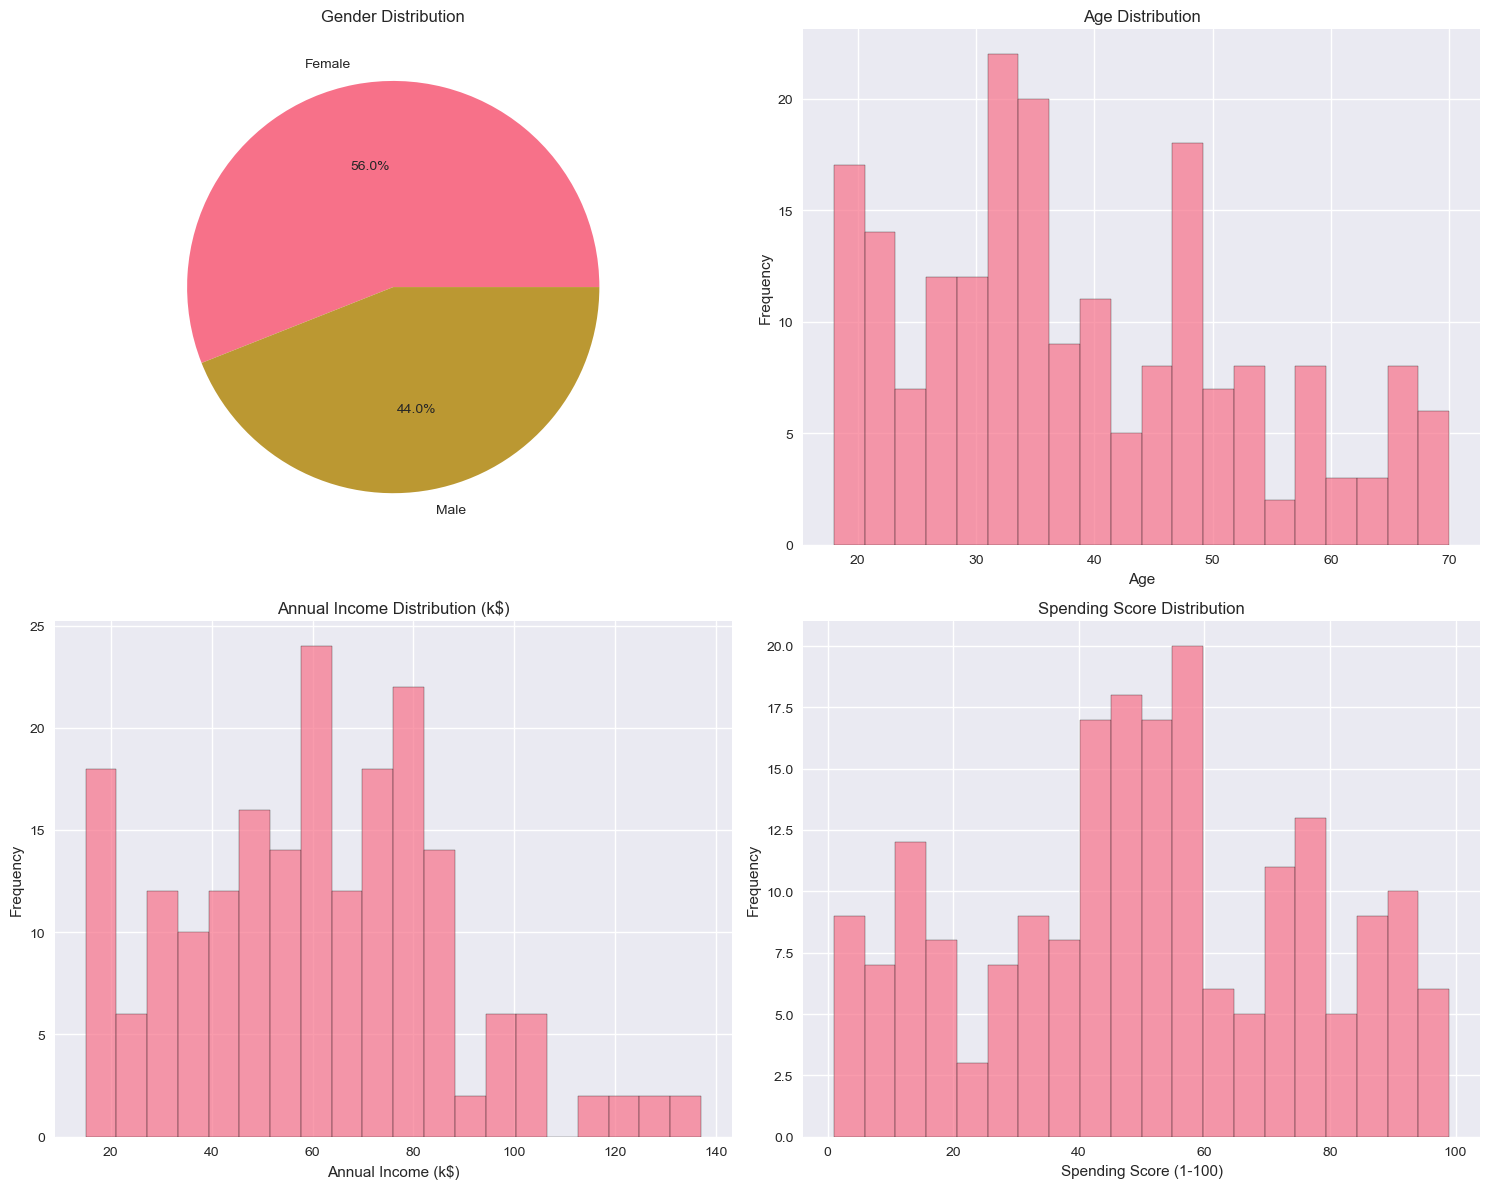

In [22]:
# Question 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Data Cleaning
print("Missing values:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print("\nData types:")
print(df.dtypes)

df_clean = df.copy()

# Rename columns for easier handling if needed
df_clean.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

# Step 2: Exploratory Data Analysis (EDA)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gender distribution
gender_counts = df_clean['Gender'].value_counts()
axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Gender Distribution')

# Age distribution
axes[0,1].hist(df_clean['Age'], bins=20, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')

# Annual Income distribution
axes[1,0].hist(df_clean['AnnualIncome'], bins=20, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Annual Income Distribution (k$)')
axes[1,0].set_xlabel('Annual Income (k$)')
axes[1,0].set_ylabel('Frequency')

# Spending Score distribution
axes[1,1].hist(df_clean['SpendingScore'], bins=20, edgecolor='black', alpha=0.7)
axes[1,1].set_title('Spending Score Distribution')
axes[1,1].set_xlabel('Spending Score (1-100)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

K MEANS WITH 1 SUITABLE FEATURE


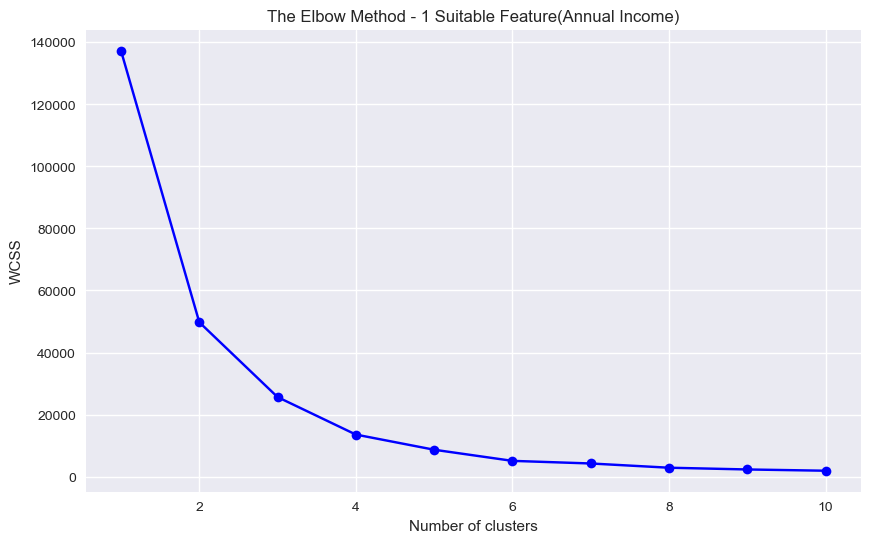

Kmeans clustering with 1 Suitable feature done


In [9]:
# Question 3(a)
print("K MEANS WITH 1 SUITABLE FEATURE")
X1=df[['Annual Income (k$)']]
wcss=[]
k_range=range(1,11)
for k in k_range:
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(k_range,wcss,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method - 1 Suitable Feature(Annual Income)')
plt.show()
kmeans1 = KMeans(n_clusters=5, random_state=42)
df['Cluster_1feature']= kmeans.fit_predict(X1)
print("Kmeans clustering with 1 Suitable feature done")

Calculating silhouette scores


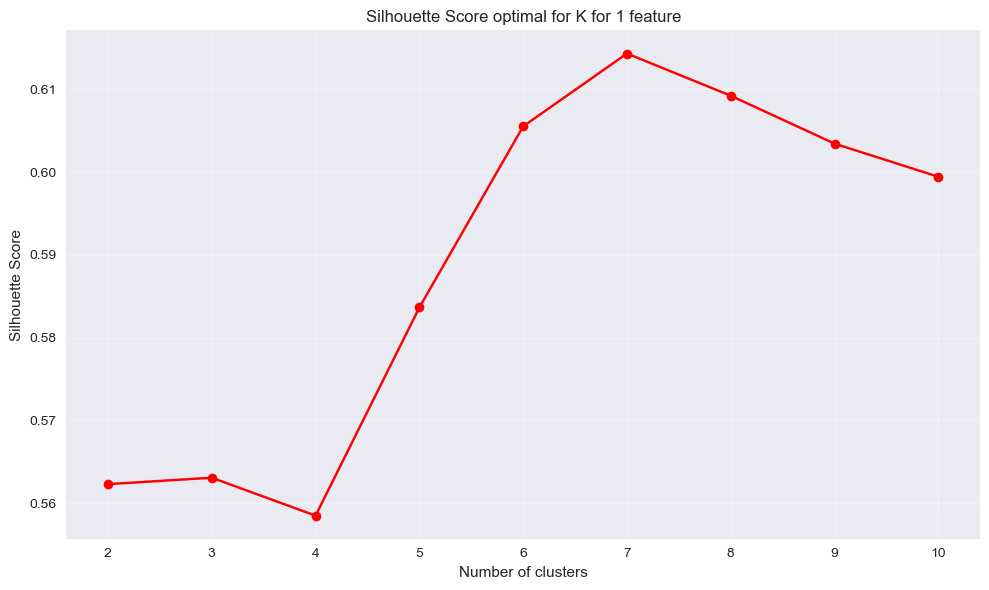


 Optimal clusters analysis:
Elbow method suggests: k=3
Silhouette method suggests: k=7
Selected k for clustering: 3

 Applying K-means with k=3

 Cluster analysis (1 feature)
                  Annual Income (k$)  Spending Score (1-100)  Gender
Cluster_1feature                                                    
0                          33.486486               50.229730      74
1                          67.088889               50.000000      90
2                          99.888889               50.638889      36
--- Starting K-Means with 2 Suitable Features ---
Features selected for 2-feature clustering: Annual Income (k$) and Spending Score (1-100)
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [15]:
# Question 3(b)
print("Calculating silhouette scores")
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouette_scores,'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score optimal for K for 1 feature')
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

optimal_k_elbow =3
optimal_k_silhouette= range(2,11)[np.argmax(silhouette_scores)]
print(f"\n Optimal clusters analysis:")
print(f"Elbow method suggests: k={optimal_k_elbow}")
print(f"Silhouette method suggests: k={optimal_k_silhouette}")

final_k=optimal_k_elbow
print(f"Selected k for clustering: {final_k}")
print(f"\n Applying K-means with k={final_k}")
kmeans_1feature=KMeans(n_clusters=final_k,random_state=42, n_init=10)
df['Cluster_1feature']=kmeans_1feature.fit_predict(X1)
print("\n Cluster analysis (1 feature)")
cluster_summary_1f=df.groupby('Cluster_1feature').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean','Gender':'count'})
print(cluster_summary_1f)

# Optimal number of clusters using both the elbow and silhouette scores for verification
print("--- Starting K-Means with 2 Suitable Features ---")
#Select the two features (Annual Income and Spending Score)
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print("Features selected for 2-feature clustering: Annual Income (k$) and Spending Score (1-100)")
print(X2.head())


--- Elbow Method for 2 Features ---


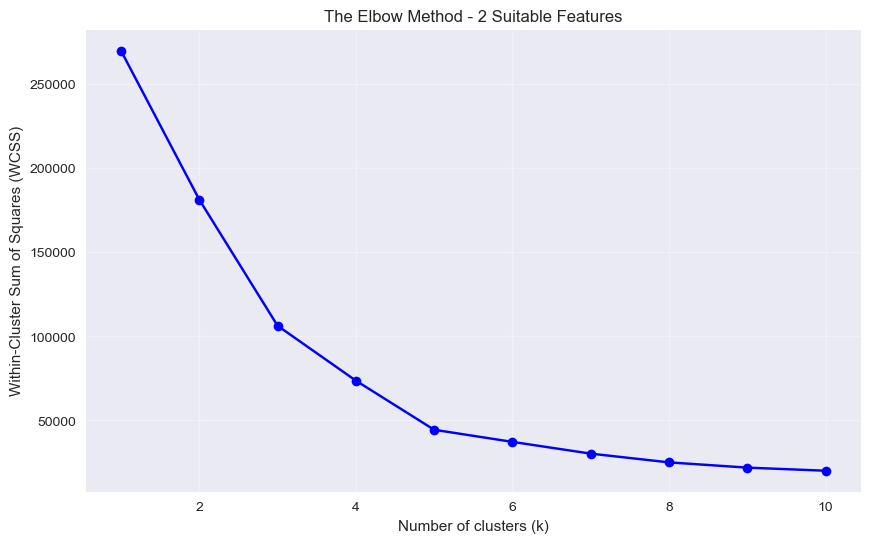


--- Silhouette Score for 2 Features ---


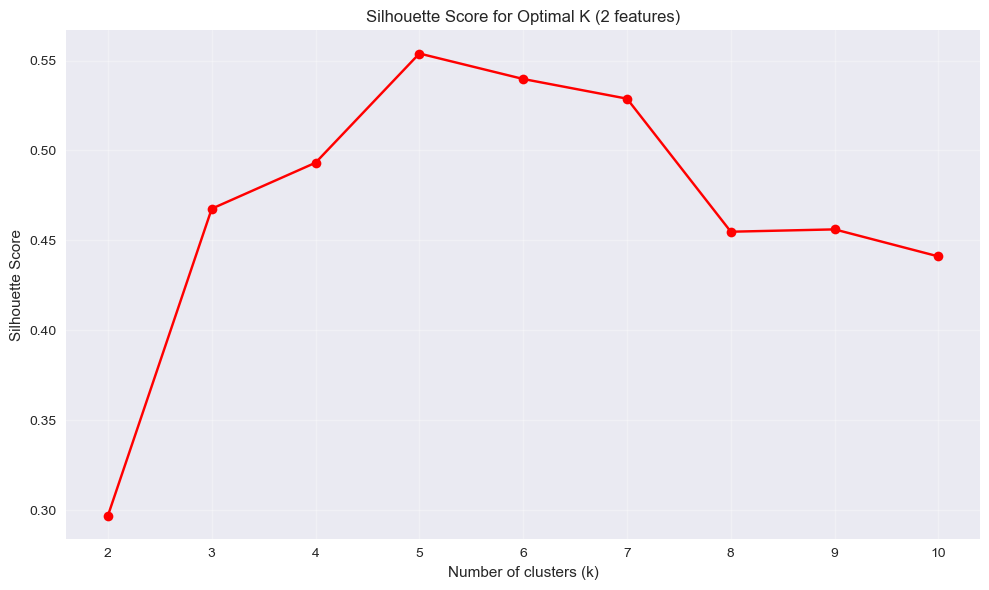

The Silhouette Method suggests: k=5 (highest score)

--- Applying K-Means with selected k=5 (2 features) ---
K-Means clustering with k=5 for 2 features is complete.
New column 'Cluster_2features' added to your DataFrame.
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_2features  
0                  4  
1                  2  
2                  4  
3                  2  
4                  4  

--- Cluster Analysis (2 features) ---
                   Annual Income (k$)  Spending Score (1-100)        Age  \
Cluster_2features                                                          
0    

In [23]:
# Question 4
print("\n--- Elbow Method for 2 Features ---")
wcss = []
k_range = range(1, 11) # We'll check k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # n_init=10 is good practice
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('The Elbow Method - 2 Suitable Features')
plt.grid(True, alpha=0.3)
plt.show()

print("\n--- Silhouette Score for 2 Features ---")
silhouette_scores_2f = []
# Silhouette score is not defined for k=1, so we start from k=2
for k in range(2, 11): # We'll check k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silhouette_scores_2f.append(silhouette_avg)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_2f, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K (2 features)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# Find the k with the highest silhouette score
optimal_k_silhouette_2f = range(2, 11)[np.argmax(silhouette_scores_2f)]
print(f"The Silhouette Method suggests: k={optimal_k_silhouette_2f} (highest score)")

#Based on both the Elbow and Silhouette plots, k=5 is a good choice.
final_k_2f = 5
print(f"\n--- Applying K-Means with selected k={final_k_2f} (2 features) ---")
kmeans_2features = KMeans(n_clusters=final_k_2f, random_state=42, n_init=10)
df['Cluster_2features'] = kmeans_2features.fit_predict(X2)
print(f"K-Means clustering with k={final_k_2f} for 2 features is complete.")
print("New column 'Cluster_2features' added to your DataFrame.")
print(df.head())

print("\n--- Cluster Analysis (2 features) ---")
cluster_summary_2f = df.groupby('Cluster_2features').agg({
'Annual Income (k$)': 'mean',
'Spending Score (1-100)': 'mean',
'Age': 'mean', # Also including Age for a more complete understanding of each segment
'Gender': 'count' # This counts the number of customers in each cluster
}).rename(columns={'Gender': 'Number of Customers'}) # Rename 'Gender' to 'Number of Customers' for clarity
print(cluster_summary_2f)

# Question 5
Based on the 5-cluster model, the mall can tailor engagement strategies for different customer groups.

-High Income / High Spenders: Reward them with exclusive offers, personalized shopping experiences, and loyalty programs to retain them.

-High Income / Low Spenders: Encourage them to spend more through premium promotions, bundled deals, and VIP events.

-Low Income / High Spenders: Provide discounts and loyalty points to sustain their purchasing behavior.

-Low Income / Low Spenders: Run awareness campaigns and budget-friendly product offers to increase footfall.

-Average Customers: Use seasonal promotions and targeted marketing to increase spending.

-These customer engagement strategies allow the mall to allocate resources effectively and increase overall revenue.